In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
dataset= pd.read_csv("credit card.csv")
dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [4]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
dataset.shape

(8950, 18)

In [6]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
dataset= dataset.fillna(0,)


In [8]:
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data = dataset.drop(columns=['CUST_ID'])
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


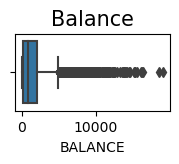

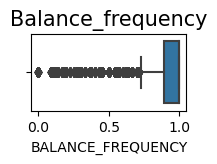

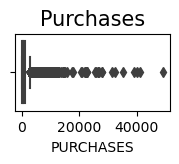

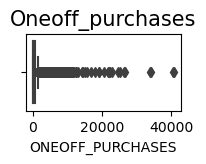

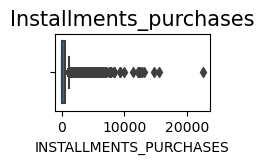

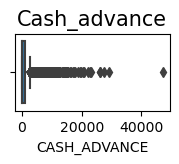

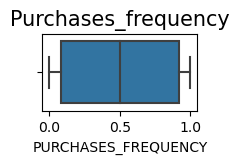

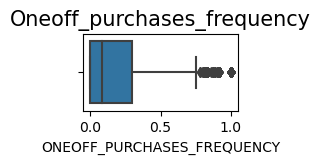

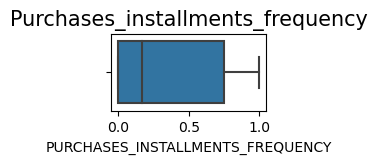

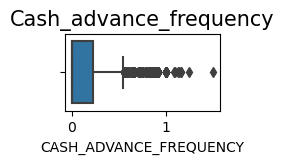

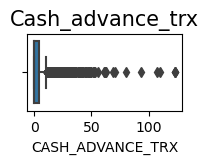

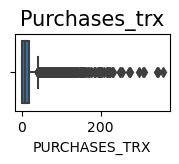

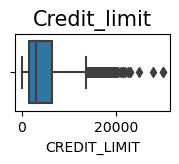

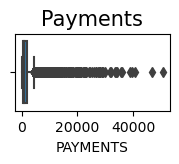

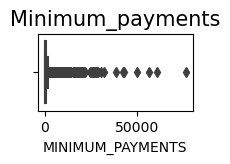

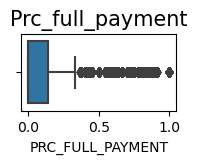

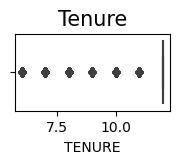

In [10]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(2,1))
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(col.capitalize(), fontsize=15)
    plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")

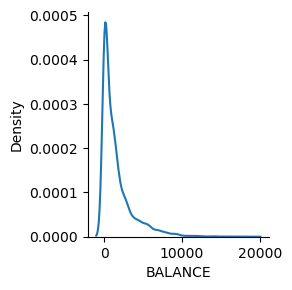

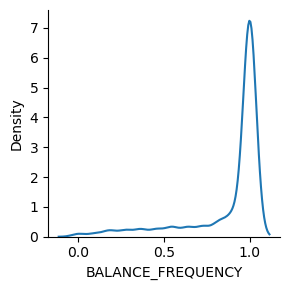

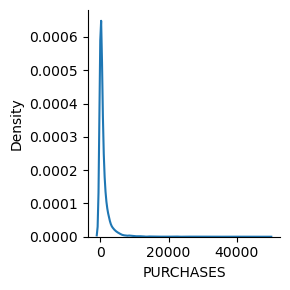

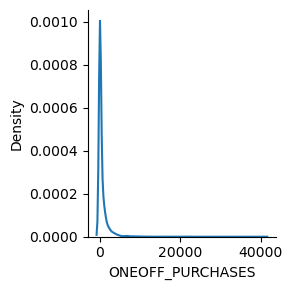

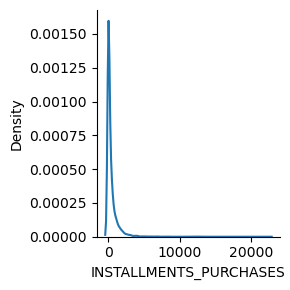

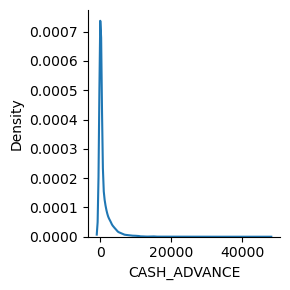

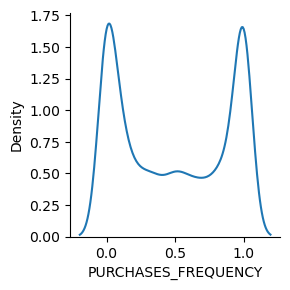

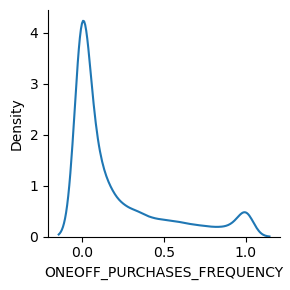

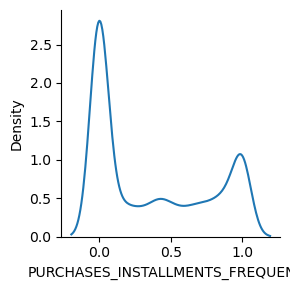

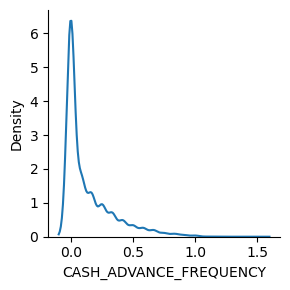

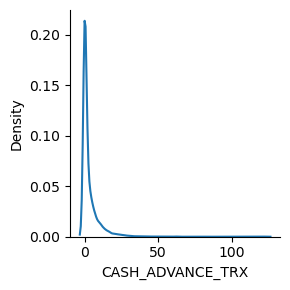

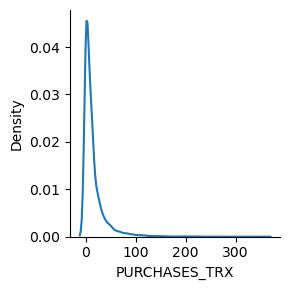

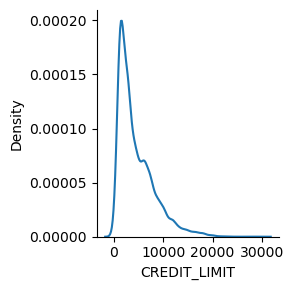

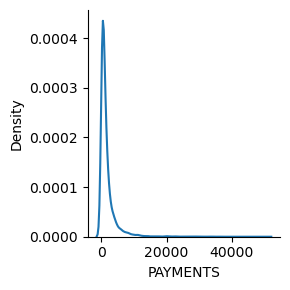

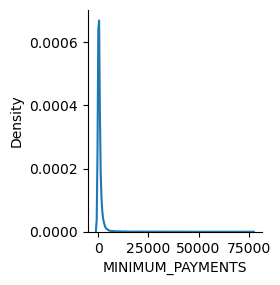

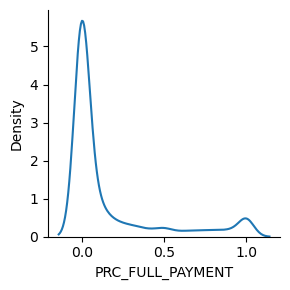

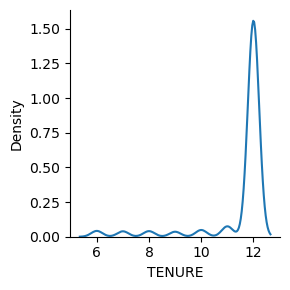

In [12]:
for col in data.columns:
    sns.displot(x=data[col],kind='kde',ax=ax, height=3)
    ax.set_title(col.capitalize(), fontsize=15)
    plt.show()

In [13]:
from scipy import stats
z_scores = stats.zscore(data)
outliers = (z_scores > 3) | (z_scores < -3)
filtered_data = data[~outliers]
print(filtered_data)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

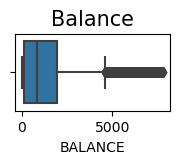

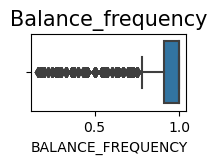

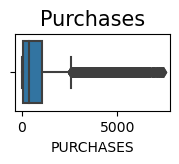

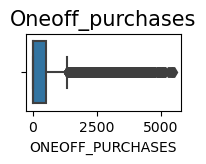

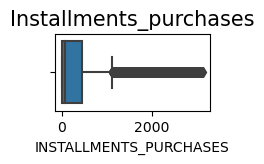

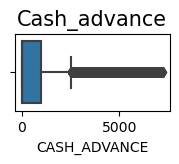

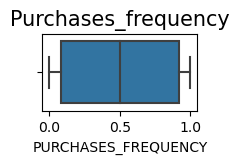

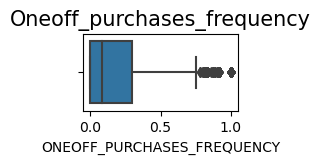

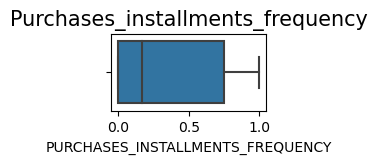

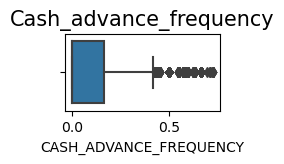

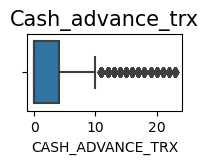

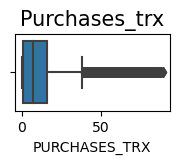

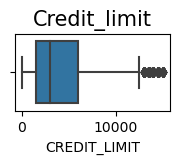

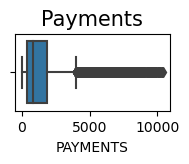

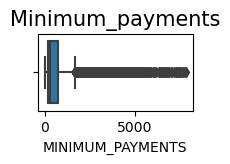

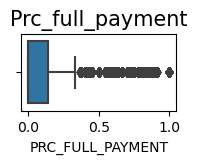

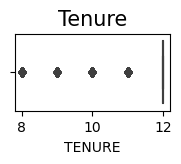

In [14]:
for col in filtered_data.columns:
    fig, ax = plt.subplots(figsize=(2,1))
    sns.boxplot(x=filtered_data[col], ax=ax)
    ax.set_title(col.capitalize(), fontsize=15)
    plt.show()

In [15]:
for col in filtered_data.columns:
    filtered_data[col].fillna(filtered_data[col].mean(), inplace=True)
  

In [16]:
  filtered_data.isnull().sum()
    

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
log_filtered_data= np.log(filtered_data)

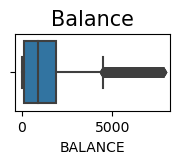

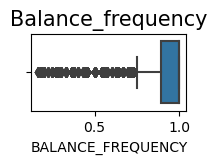

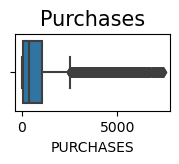

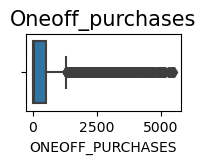

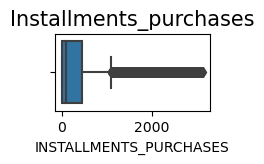

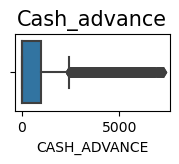

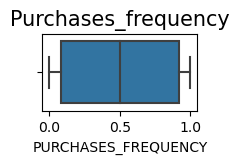

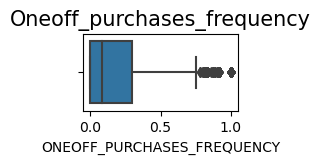

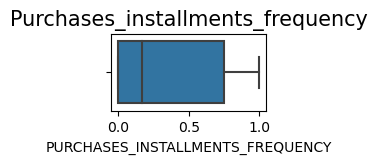

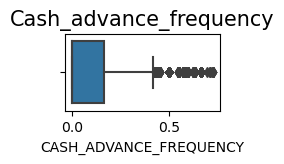

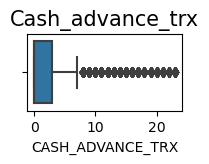

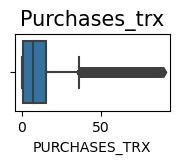

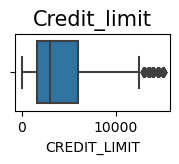

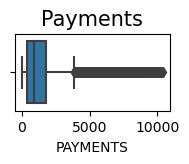

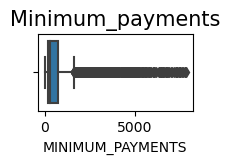

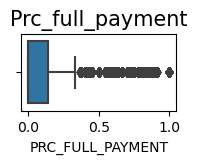

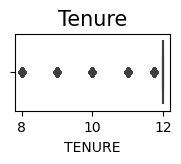

In [18]:
for col in filtered_data.columns:
    fig, ax = plt.subplots(figsize=(2,1))
    sns.boxplot(x=filtered_data[col], ax=ax)
    ax.set_title(col.capitalize(), fontsize=15)
    plt.show()

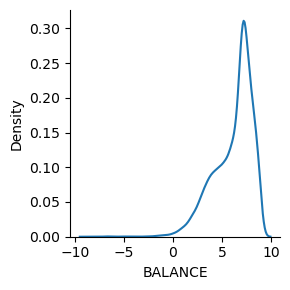

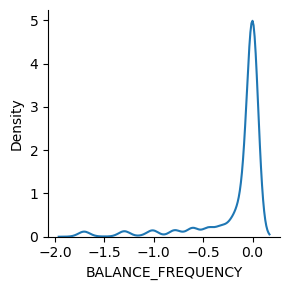

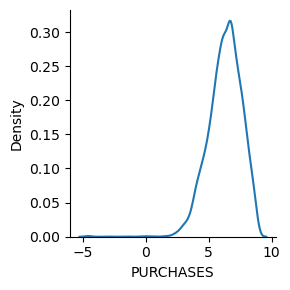

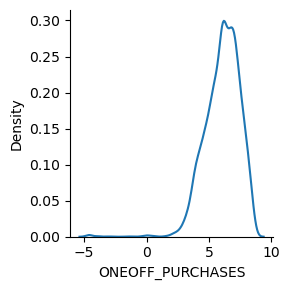

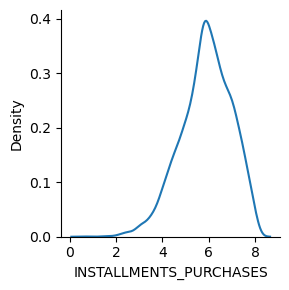

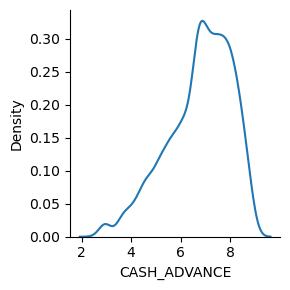

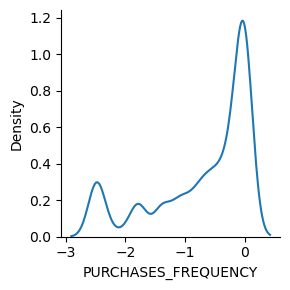

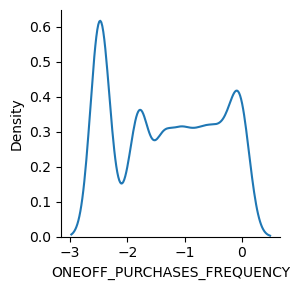

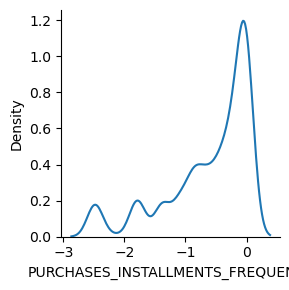

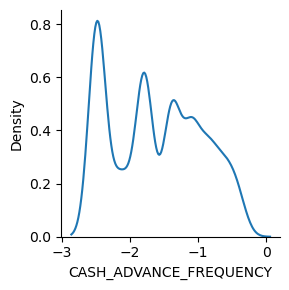

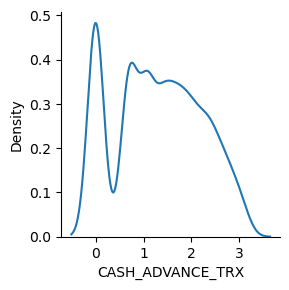

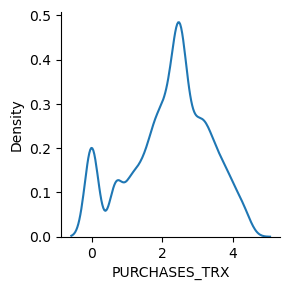

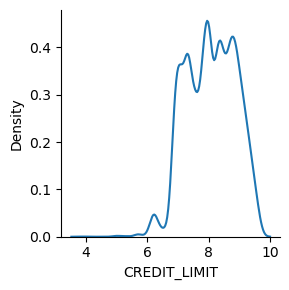

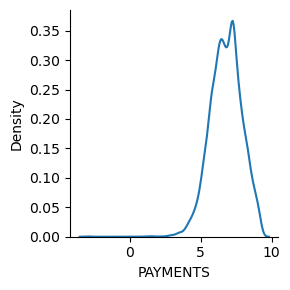

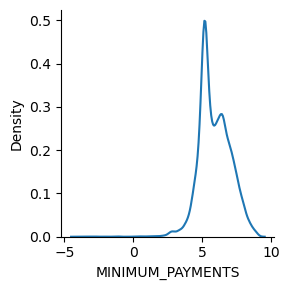

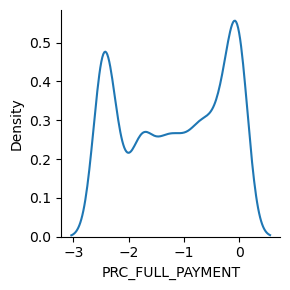

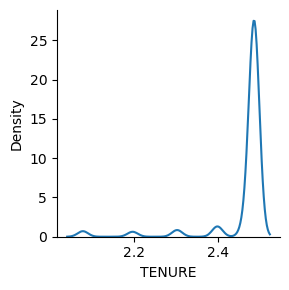

In [19]:
for col in log_filtered_data.columns:
    sns.displot(x=log_filtered_data[col],kind='kde',ax=ax, height=3)
    ax.set_title(col.capitalize(), fontsize=15)
    plt.show()

In [20]:
filtered_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.337738,0.075079,0.095182,-0.012385,0.464565,-0.117223,0.055511,-0.107945,0.429735,0.414398,0.037798,0.425290,0.265256,0.563156,-0.350192,0.041869
BALANCE_FREQUENCY,0.337738,1.000000,0.161861,0.123927,0.143705,0.088205,0.232731,0.186498,0.190215,0.168964,0.146032,0.209374,0.099957,0.099593,0.246935,-0.148208,0.098810
PURCHASES,0.075079,0.161861,1.000000,0.802206,0.608049,-0.125690,0.543441,0.599032,0.425145,-0.177180,-0.135597,0.666023,0.275904,0.417689,0.101964,0.188116,0.083794
ONEOFF_PURCHASES,0.095182,0.123927,0.802206,1.000000,0.255053,-0.080997,0.355276,0.680977,0.150746,-0.113995,-0.081743,0.514058,0.274322,0.368946,0.066770,0.102933,0.058752
INSTALLMENTS_PURCHASES,-0.012385,0.143705,0.608049,0.255053,1.000000,-0.133168,0.590420,0.221582,0.673876,-0.187708,-0.150258,0.580724,0.154574,0.250510,0.083053,0.217581,0.086593
CASH_ADVANCE,0.464565,0.088205,-0.125690,-0.080997,-0.133168,1.000000,-0.269323,-0.113978,-0.224033,0.635487,0.633454,-0.151049,0.249849,0.279964,0.302147,-0.204407,-0.076122
PURCHASES_FREQUENCY,-0.117223,0.232731,0.543441,0.355276,0.590420,-0.269323,1.000000,0.501343,0.862934,-0.339571,-0.275216,0.697591,0.102588,0.133109,-0.005549,0.305802,0.074514
ONEOFF_PURCHASES_FREQUENCY,0.055511,0.186498,0.599032,0.680977,0.221582,-0.113978,0.501343,1.000000,0.142329,-0.139464,-0.109160,0.566005,0.274134,0.279531,0.019014,0.157531,0.072990
PURCHASES_INSTALLMENTS_FREQUENCY,-0.107945,0.190215,0.425145,0.150746,0.673876,-0.224033,0.862934,0.142329,1.000000,-0.285412,-0.232706,0.617601,0.043328,0.099613,0.016273,0.250087,0.075446
CASH_ADVANCE_FREQUENCY,0.429735,0.168964,-0.177180,-0.113995,-0.187708,0.635487,-0.339571,-0.139464,-0.285412,1.000000,0.796719,-0.191767,0.108080,0.165714,0.269936,-0.263958,-0.071821


<Axes: >

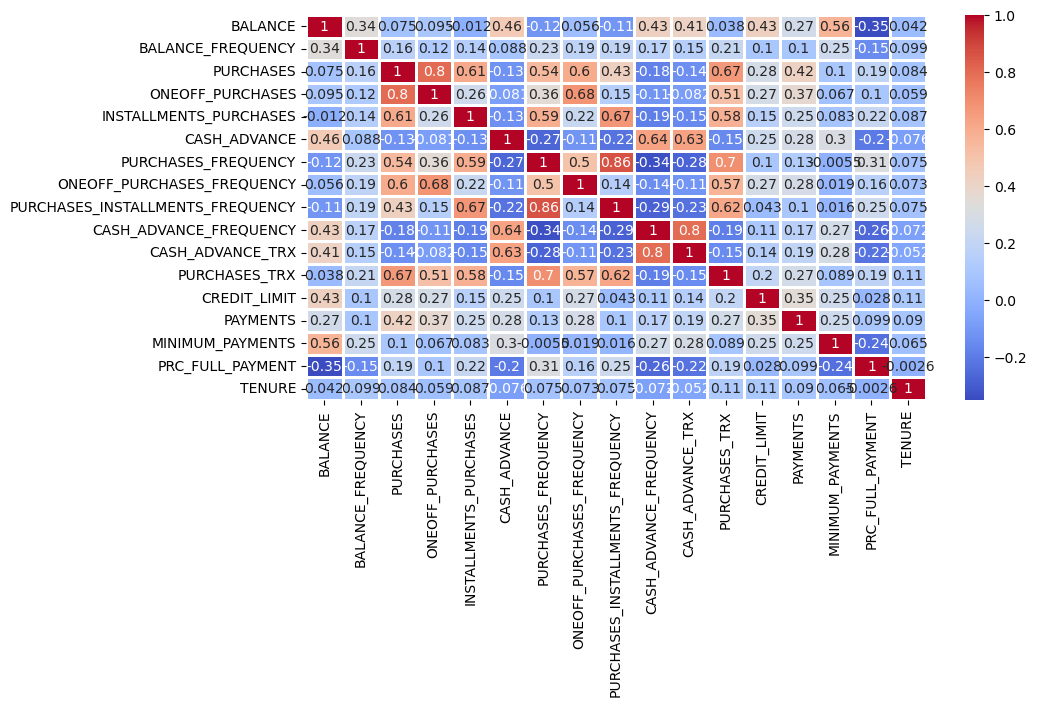

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(filtered_data.corr(),linewidth=1,annot=True, cmap='coolwarm') 


normalize data set 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_norm = scaler.fit_transform(filtered_data)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 10)
PC_data = pca.fit_transform(data_norm)
pca.explained_variance_ratio_

array([0.28280599, 0.20452915, 0.08725496, 0.07108564, 0.06084722,
       0.05268285, 0.04387557, 0.03808724, 0.03378555, 0.02857878])

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(PC_data)
    wcss.append(kmeans.inertia_)

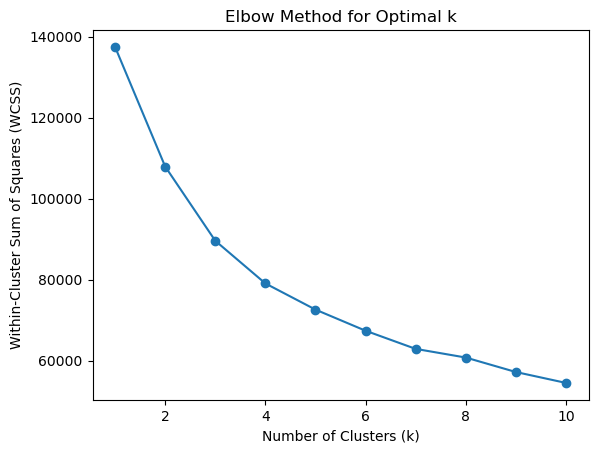

In [25]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4, init="k-means++",random_state=0)
y_kmeans=kmeans.fit_predict(PC_data)

In [27]:
y_kmeans

array([3, 1, 0, ..., 0, 3, 3])

In [28]:
sum(pca.explained_variance_ratio_)

0.9035329356034353

In [29]:
credit_card = dataset
credit_card["CLUSTERS"]= y_kmeans 
credit_card.head(10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,3
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,3


In [30]:
cluster_counts = credit_card['CLUSTERS'].value_counts()
print(cluster_counts)

3    3479
0    2560
1    1679
2    1232
Name: CLUSTERS, dtype: int64


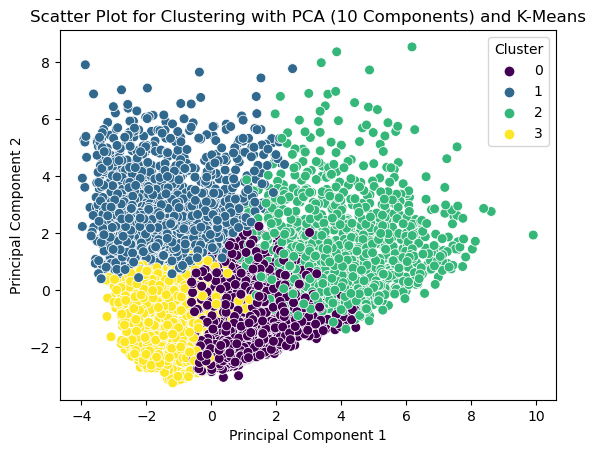

In [31]:
sns.scatterplot(x=PC_data[:, 0], y=PC_data[:, 1], hue=credit_card['CLUSTERS'], palette='viridis', s=50)
plt.title('Scatter Plot for Clustering with PCA (10 Components) and K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

APPLYING HIERARCHY CLUSTERING TO OUR SCALED DATA SET 

In [32]:
import  scipy.cluster.hierarchy  as sch
from sklearn.cluster import AgglomerativeClustering

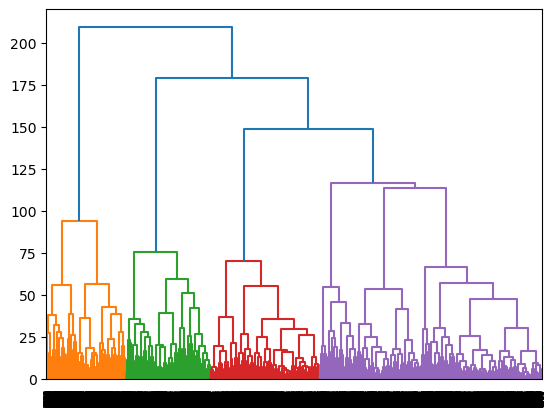

In [33]:

dendrogram =sch.dendrogram(sch.linkage(data_norm, method="ward"))                                    

In [34]:
hc = AgglomerativeClustering(n_clusters= 4,affinity= "euclidean", linkage="ward")

In [35]:
y_hc= hc.fit_predict(data_norm)

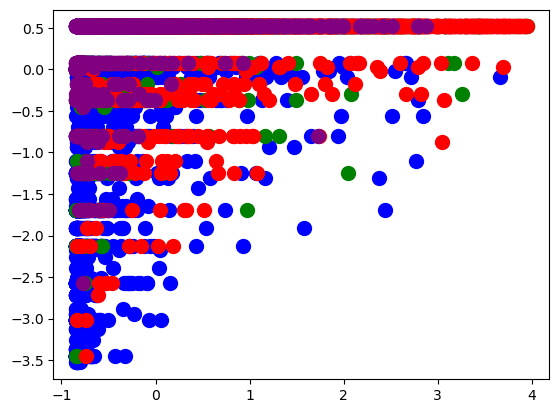

In [36]:
plt.scatter(data_norm[y_hc==0,0], data_norm[y_hc==0,1], s=100, c= "blue")
plt.scatter(data_norm[y_hc==1,0], data_norm[y_hc==1,1], s=100, c= "green")
plt.scatter(data_norm[y_hc==2,0], data_norm[y_hc==2,1], s=100, c= "red")
plt.scatter(data_norm[y_hc==3,0], data_norm[y_hc==3,1], s=100, c= "purple")

In [37]:
y_hc

array([0, 2, 1, ..., 3, 0, 2], dtype=int64)

In [38]:
customer_card = dataset

In [39]:
customer_card ['cluster'] = y_hc

In [40]:
customer_card

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,3,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,3
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,0,3
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,3
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3,0
